In [17]:
import numpy 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [18]:
df=pd.read_csv('Boston Dataset.csv')

In [19]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
df.isna().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

<AxesSubplot:>

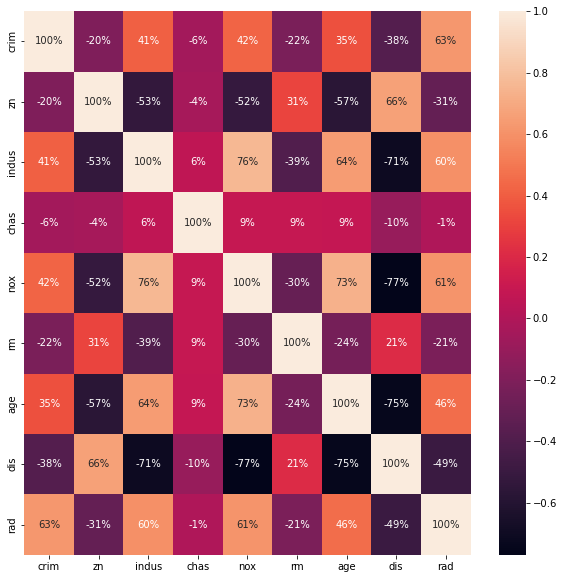

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:10].corr(),annot=True,fmt=".0%")

In [22]:
#Cleaning the data
df.drop(columns=['Unnamed: 0'], axis=0,inplace=True)

In [23]:
x=df.iloc[:,0:12].values
y=df.iloc[:,13].values

In [24]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, x, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, x, y)


Model Report
MSE: 26.223129500280237
CV Score: 46.852047682028584


In [26]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)


Model Report
MSE: 28.962992125984247
CV Score: 68.02618889536014


In [27]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, x, y)


Model Report
MSE: 13.974494551181113
CV Score: 29.408190998427482


In [28]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, x, y)


Model Report
MSE: 11.525366291338583
CV Score: 34.809223941758866
